### Ali Ataollahi - 810199461

## Q1

## Section 1 - Preprocessing

In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
from sklearn.model_selection import train_test_split

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_data(file_path, random_state=42, test_size=0.2, encoding='latin-1', encoding_errors='ignore', remove_stopwords=True, stemming=False):
    data = pd.read_csv(file_path, header=None, names=['label', 'id', 'date', 'query', 'user', 'text'], encoding=encoding, encoding_errors=encoding_errors)

    classes = data['label'].unique()

    sampled_data = {c: data[data['label'] == c].sample(n=5000, random_state=random_state) for c in classes}

    combined_data = pd.concat(sampled_data.values())

    combined_data['tokens'] = combined_data['text'].apply(preprocess_text, remove_stopwords=remove_stopwords, stemming=stemming)

    train_data, eval_data = train_test_split(combined_data, test_size=test_size, random_state=random_state)

    return train_data, eval_data

def preprocess_text(text, remove_stopwords=True, stemming=False):
    tokens = nltk.word_tokenize(text.lower())

    tokens = [token for token in tokens if token.isalnum()]

    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

    if stemming:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]

    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ali18\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ali18\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train_data, eval_data = preprocess_data('data/tweets.csv', encoding='latin-1', remove_stopwords=True, stemming=False)

In [3]:
train_data

,label,id,date,query,user,text,tokens
861732,4,1676735463,Fri May 01 23:00:41 PDT 2009,NO_QUERY,jzbich,@akynos - we so need to sit one day over some ...,"[akynos, need, sit, one, day, drinks, convos, ..."
790821,0,2325772421,Thu Jun 25 06:02:19 PDT 2009,NO_QUERY,Malibu_Demon,is trying to worry about too many people at on...,"[trying, worry, many, people, one, time, good,..."
81703,0,1752809650,Sat May 09 23:03:57 PDT 2009,NO_QUERY,JasManiac,@_Raymond I was going to stream it live via my...,"[going, stream, live, via, bb, storm, internet..."
956378,4,1825220500,Sun May 17 04:51:34 PDT 2009,NO_QUERY,chelzmae,Had a nice time with Gokesters! Particularly K...,"[nice, time, gokesters, particularly, kewl, ic..."
1389784,4,2053159144,Sat Jun 06 03:30:26 PDT 2009,NO_QUERY,vandrefalk,"thanks, so do I",[thanks]
...,...,...,...,...,...,...,...
1597563,4,2192959627,Tue Jun 16 07:47:57 PDT 2009,NO_QUERY,ekchan,I love the ONU Admissions BAs...always good fo...,"[love, onu, admissions, bas, always, good, laugh]"
1287472,4,2002372988,Tue Jun 02 04:01:17 PDT 2009,NO_QUERY,Caraa_x,Waiting for mum friend to come he gonna teach ...,"[waiting, mum, friend, come, gon, na, teach, d..."
885181,4,1686446949,Sun May 03 05:28:27 PDT 2009,NO_QUERY,Kibbely,@Lisa_Veronica hey Lisa! can't wait to see you...,"[hey, lisa, ca, wait, see, us, looking, forwar..."
119197,0,1827994269,Sun May 17 11:52:26 PDT 2009,NO_QUERY,lasharitiavuana,got back from church i broke her foot when i c...,"[got, back, church, broke, foot, caught, holyg..."


In [4]:
eval_data

,label,id,date,query,user,text,tokens
1229268,4,1991330743,Mon Jun 01 06:50:34 PDT 2009,NO_QUERY,BRUNETTEBARBIEE,Found the perfect title for my portfolio. its...,"[found, perfect, title, portfolio, song, love]"
142590,0,1881517921,Fri May 22 04:52:46 PDT 2009,NO_QUERY,petdoctorforum,my new anti-virus ive just installed seems to ...,"[new, ive, installed, seems, effective, strugg..."
377131,0,2051830441,Fri Jun 05 22:55:06 PDT 2009,NO_QUERY,juliecastle_9,fact: i still love him...you learn from mistak...,"[fact, still, love, learn, mistakes, hope, rep..."
266455,0,1988997171,Mon Jun 01 00:00:59 PDT 2009,NO_QUERY,sojufied,i think i gotta make a new twitter account cuz...,"[think, got, ta, make, new, twitter, account, ..."
454929,0,2070776908,Sun Jun 07 18:16:45 PDT 2009,NO_QUERY,janicetertel,end of the weekend....back to work tomorrow W...,"[end, weekend, back, work, tomorrow, need, lon..."
...,...,...,...,...,...,...,...
1360949,4,2048923745,Fri Jun 05 16:00:07 PDT 2009,NO_QUERY,laceygraystone,Oh AND i'm in cabin a! They're the youngest ca...,"[oh, cabin, youngest, 8, going, partay]"
1107536,4,1971592442,Sat May 30 07:27:17 PDT 2009,NO_QUERY,mynameissasha,@Blink_LapSap Take a photo with Steve tonight ...,"[take, photo, steve, tonight, post, twitpic, p..."
1555722,4,2185194109,Mon Jun 15 17:01:25 PDT 2009,NO_QUERY,kittenhotep,@lesleydenford there's this stuff called ox-e ...,"[lesleydenford, stuff, called, drops, made, nz..."
668193,0,2245850923,Fri Jun 19 16:43:52 PDT 2009,NO_QUERY,oumiec,BBL..Let the count down begin~~~~~~~~~~ 5hrs t...,"[bbl, let, count, 5hrs, go]"


<Axes: xlabel='label'>

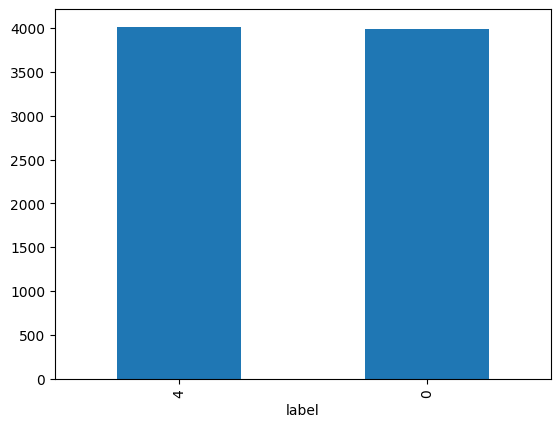

In [5]:
train_data['label'].value_counts().plot(kind='bar')

## Section 2 - First displacement vector - TERM FREQUENCY

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
tf_vectors_train = vectorizer.fit_transform(train_data['tokens'].apply(' '.join))
tf_vectors_test = vectorizer.transform(eval_data['tokens'].apply(' '.join))

## Section 3 - Second displacement vector - TF-IDF

In [7]:
import nltk
from hazm import Normalizer, word_tokenize
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB

nltk.download('punkt')

class TfIdfVectorizer:
    def __init__(self, train_data, eval_data):
        self.train_data = train_data
        self.eval_data = eval_data
        self.sentences = []
        self.word_set = []
        self.index_dict = {}
        self.word_count = {}
        self.total_documents = 0
        self.tfidf_vectors_train = []
        self.tfidf_vectors_test = []

    def preprocess_data(self):
        for index, sent in self.train_data.iterrows():
            x = [i.lower() for i in word_tokenize(sent['text']) if i.isalpha()]
            self.sentences.append(x)
            for word in x:
                if word not in self.word_set:
                    self.word_set.append(word)

        self.word_set = set(self.word_set)
        self.total_documents = len(self.sentences)

    def create_index_dict(self):
        i = 0
        for word in self.word_set:
            self.index_dict[word] = i
            i += 1

    def calculate_word_count(self):
        for word in self.word_set:
            self.word_count[word] = 0
            for sent in self.sentences:
                if word in sent:
                    self.word_count[word] += 1

    def termfreq(self, document, word):
        N = len(document)
        occurance = len([token for token in document if token == word])
        return occurance / N

    def inverse_doc_freq(self, word):
        try:
            word_occurance = self.word_count[word] + 1
        except:
            word_occurance = 1
        return np.log(self.total_documents / word_occurance)

    def tf_idf(self, sentence):
        tf_idf_vec = np.zeros((len(self.word_set),))
        for word in sentence:
            tf = self.termfreq(sentence, word)
            idf = self.inverse_doc_freq(word)
            value = tf * idf
            try:
                tf_idf_vec[self.index_dict[word]] = value
            except:
                continue
        return tf_idf_vec

    def generate_tfidf_vectors(self):
        for sent in self.sentences:
            vec = self.tf_idf(sent)
            self.tfidf_vectors_train.append(vec)

        sentences_test = []
        for index, sent in self.eval_data.iterrows():
            x = [i.lower() for i in word_tokenize(sent['text']) if i.isalpha()]
            sentences_test.append(x)

        for sent in sentences_test:
            vec = self.tf_idf(sent)
            self.tfidf_vectors_test.append(vec)

    def vectorize(self):
        self.preprocess_data()
        self.create_index_dict()
        self.calculate_word_count()
        self.generate_tfidf_vectors()
        return self.tfidf_vectors_train, self.tfidf_vectors_test


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ali18\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
vectorizer = TfIdfVectorizer(train_data, eval_data)
tfidf_vectors_train, tfidf_vectors_test = vectorizer.vectorize()

## Section 4 - Third displacement vector - PPMI

In [26]:
class PPMIVectorizer:
    def __init__(self, train_data, eval_data):
        self.train_data = train_data
        self.eval_data = eval_data
        self.n_labels = self.train_data['label'].value_counts()
        sentences = []
        word_set = []
        self.count_happy_words = {}
        self.count_sad_words = {}
        
        for index, sent in train_data.iterrows():
            x = [i.lower() for  i in word_tokenize(sent['text']) if i.isalpha()]
            sentences.append(x)
            for word in x:
                if word not in word_set:
                    word_set.append(word)
                    
        self.word_set = set(word_set)
        self.index_dict = {}
        self.create_index_dict()
        self.sentences = sentences
        self.word_count = self.count_dict(sentences)

    # Calculates the PPMI score of a specific word in both the "happy" and "sad" label categories.
    def calculate_PPMI(self, word):
        # Pointwise Mutual Information (PMI) is a feature scoring metrics that estimate the association between a feature and a class.
        n = self.train_data.shape[0]

        # Calculates the probabilities of a comment belonging to each label category.
        p_sad = self.n_labels[0] / n
        p_happy = self.n_labels[4] / n

        p_word = self.word_count[word] / n
        p_happy_word = self.count_happy_words[word] / n
        p_sad_word = self.count_sad_words[word] / n

        happy_PMI = p_happy_word / (p_word * p_happy)
        sad_PMI = p_sad_word / (p_word * p_sad)

        happy_PPMI = 0
        sad_PPMI = 0
        if happy_PMI > 0:
            happy_PPMI = happy_PMI
        if sad_PMI > 0:
            sad_PPMI = sad_PMI

        return happy_PPMI, sad_PPMI

    def create_index_dict(self):
        i = 0
        for word in self.word_set:
            self.index_dict[word] = i
            i += 1

    # Calculates the PPMI vectors for a given sentence.
    def PPMI(self, sentence):
        PPMI_vector_sad = np.zeros((len(self.word_set),))
        PPMI_vector_happy = np.zeros((len(self.word_set),))
        for word in sentence:
            try:
                h, s = self.calculate_PPMI(word)
                PPMI_vector_sad[self.index_dict[word]] = s
                PPMI_vector_happy[self.index_dict[word]] = h
            except:
                continue
        return PPMI_vector_sad, PPMI_vector_happy
    
    def count_dict(self, sentences):
        word_count = {}
        for word in self.word_set:
            word_count[word] = 0
            for sent in sentences:
                if word in sent:
                    word_count[word] += 1
        return word_count
    
    def vectorize(self):
        # Tokenizing Text Data Using NLTK Library.
        sentences_happy = []
        sentences_sad = []

        for index, sent in self.train_data.iterrows():
            if sent['label'] == 0:
                x_sad = [i.lower() for i in word_tokenize(sent['text']) if i.isalpha()]
                sentences_sad.append(x_sad)
            elif sent['label'] == 4:
                x_happy = [i.lower() for i in word_tokenize(sent['text']) if i.isalpha()]
                sentences_happy.append(x_happy)

        self.count_happy_words = self.count_dict(sentences_happy)
        self.count_sad_words = self.count_dict(sentences_sad)

        # Generating PPMI Vectors for each comment in the training set.
        PPMI_vector = []
        for sent in self.sentences:
            vec_sad, vec_happy = self.PPMI(sent)
            PPMI_vector.append([vec_sad,vec_happy])

        # Reshapes the PPMI vectors of trainig data.
        features_train = np.array(PPMI_vector)
        ppmi_vectors_train = features_train.reshape(features_train.shape[0],features_train.shape[1]*features_train.shape[2])

        sentences_test = []
        for index, sent in self.eval_data.iterrows():
            x = [i.lower() for i in word_tokenize(sent['text']) if i.isalpha()]
            sentences_test.append(x)

        # Generating PPMI Vectors for each comment in the test set.
        PPMI_vector_test = []
        for sent in sentences_test:
            vec_sad, vec_happy = self.PPMI(sent)
            PPMI_vector_test.append([vec_sad,vec_happy])

        # Reshapes the PPMI vectors of test data.
        features_test = np.array(PPMI_vector_test)
        ppmi_vectors_test = features_test.reshape(features_test.shape[0],features_test.shape[1]*features_test.shape[2])

        return ppmi_vectors_train, ppmi_vectors_test

In [27]:
ppmi_vectorizer = PPMIVectorizer(train_data, eval_data)
ppmi_vectors_train, ppmi_vectors_test = ppmi_vectorizer.vectorize()

## Section 5 - Training

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

def apply_naive_bayes(vectorizer_train, vectorizer_test, train_labels, test_labels):
    naive_bayes_classifier = MultinomialNB()
    naive_bayes_classifier.fit(vectorizer_train, train_labels)
    y_pred = naive_bayes_classifier.predict(vectorizer_test)
    print(classification_report(test_labels, y_pred))


In [29]:
print("TF Vectors:")
apply_naive_bayes(tf_vectors_train, tf_vectors_test, train_data['label'], eval_data['label'])

TF Vectors:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1012
           4       0.72      0.65      0.69       988

    accuracy                           0.70      2000
   macro avg       0.71      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000



In [30]:
print("TF-IDF Vectors:")
apply_naive_bayes(tfidf_vectors_train, tfidf_vectors_test, train_data['label'], eval_data['label'])

TF-IDF Vectors:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1012
           4       0.73      0.66      0.69       988

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000



In [31]:
print("PPMI Vectors:")
apply_naive_bayes(ppmi_vectors_train, ppmi_vectors_test, train_data['label'], eval_data['label'])

PPMI Vectors:


              precision    recall  f1-score   support

           0       0.70      0.78      0.73      1012
           4       0.74      0.65      0.69       988

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.71      2000
weighted avg       0.72      0.72      0.71      2000

